In [1]:
# 建立数据集合，建立一个一元二次的函数，同时给y数据加上一些噪音
import torch
import matplotlib.pyplot as plt

In [2]:
# unsqueeze 是在指定位置扩充维度
x_lin = torch.linspace(-1,1,100)
print(x_lin.size())

torch.Size([100])


In [3]:
x = torch.unsqueeze(x_lin,dim=1)
print(x.size())

torch.Size([100, 1])


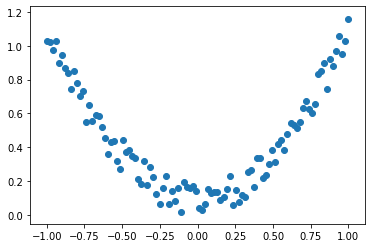

In [4]:
y = x.pow(2) + 0.2 * torch.rand(x.size())

# 画图
plt.scatter(x.data.numpy(),y.data.numpy())
plt.show()

In [5]:
type(x_lin)

torch.Tensor

In [6]:
type(x)

torch.Tensor

In [7]:
# 建立神经网络
import torch

class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(n_feature,n_hidden)
        self.predict = torch.nn.Linear(n_hidden,n_output)
        
    def forward(self,x):
        x = torch.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [8]:
net = Net(n_feature=1,n_hidden=10,n_output=1)
# 打印网络结构
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


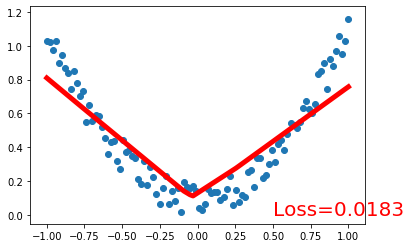

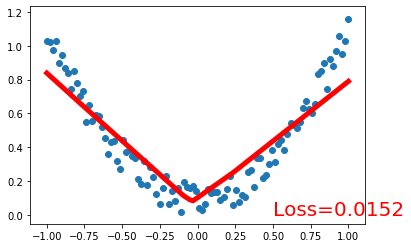

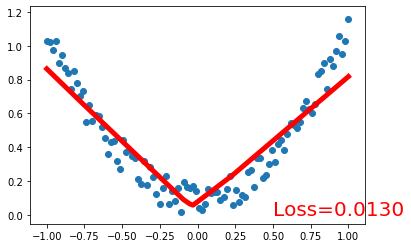

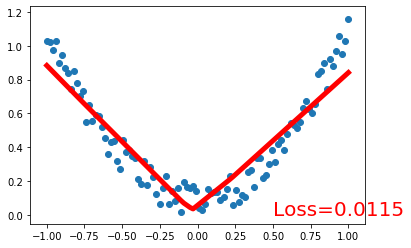

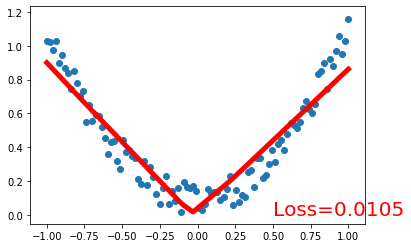

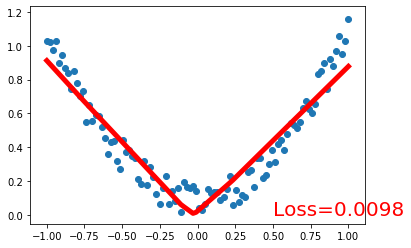

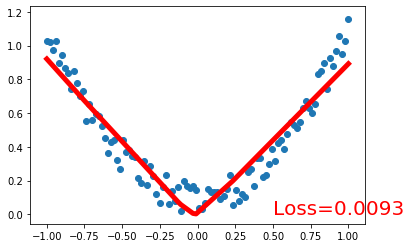

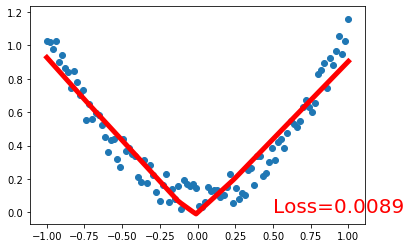

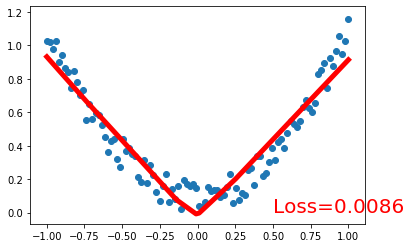

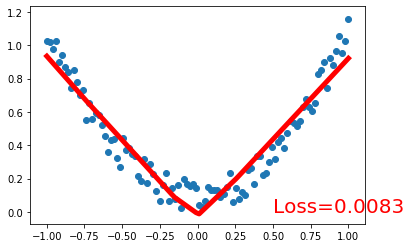

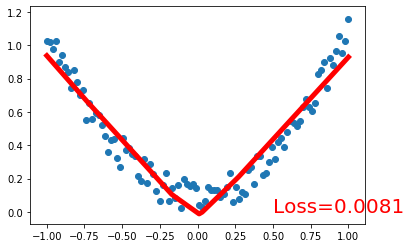

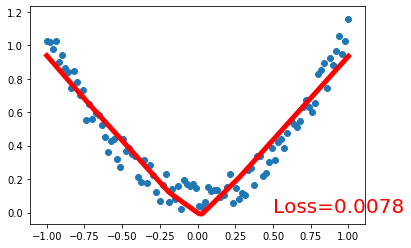

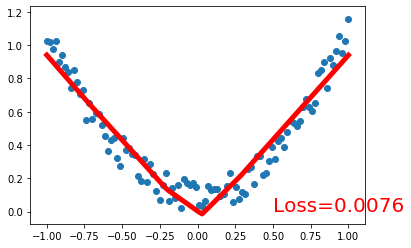

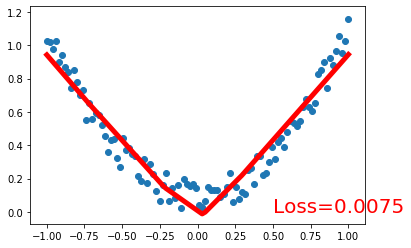

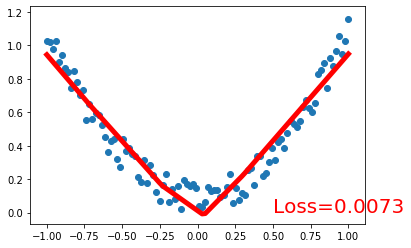

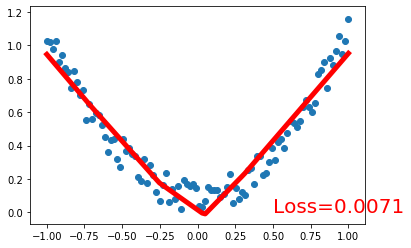

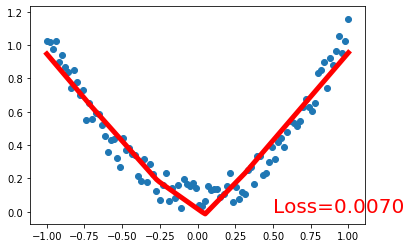

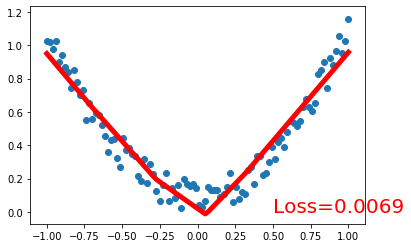

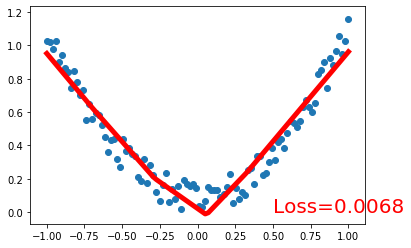

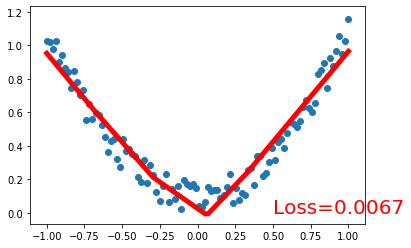

In [11]:
# 训练网络 可视化训练过程

optimizer = torch.optim.SGD(net.parameters(),lr=0.2)
loss_func = torch.nn.MSELoss()

import matplotlib.pyplot as plt
plt.ion()
plt.show()

for t in range(200):
    prediction = net(x)
    loss = loss_func(prediction,y)
    # 清空上一步的残余更新参数值
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if t % 10 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(),y.data.numpy())
        plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)
        plt.text(0.5,0,'Loss=%.4f' %loss.data.numpy(),fontdict={'size':20,'color':'red'})
        plt.pause(0.1)